<a href="https://colab.research.google.com/github/Karisuta7/5027231060_Callista-Meyra-Azizah-/blob/main/Copy_of_Praktikum2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laporan Proyek Prediksi Waktu Pengiriman - Rumah Makan Orb (チ。)

```
Nama: Callista Meyra Azizah
NRP: 5027231060
Kelas: AI-A
```



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/P2AI/'

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'submission.csv')


Lihat bentuk datanya dan cek missing values:

In [ ]:
print(train.shape)
train.info()
train.describe()
train.isnull().sum()


(700, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Pesanan              700 non-null    int64  
 1   Jenis_Kelamin           700 non-null    object 
 2   Jarak_km                700 non-null    float64
 3   Cuaca                   682 non-null    object 
 4   Tingkat_Kemacetan       677 non-null    object 
 5   Waktu                   678 non-null    object 
 6   Tipe_Kendaraan          700 non-null    object 
 7   Waktu_Persiapan_menit   700 non-null    int64  
 8   Metode_Pembayaran       700 non-null    object 
 9   Tahun_Masuk             700 non-null    int64  
 10  Total_Pesanan           673 non-null    float64
 11  Harga_Makanan           264 non-null    float64
 12  Menggunakan_Voucher     700 non-null    object 
 13  Biaya_Pengiriman        700 non-null    int64  
 14  Nama_Penerima           700 non-

,0
ID_Pesanan,0
Jenis_Kelamin,0
Jarak_km,0
Cuaca,18
Tingkat_Kemacetan,23
Waktu,22
Tipe_Kendaraan,0
Waktu_Persiapan_menit,0
Metode_Pembayaran,0
Tahun_Masuk,0


Visualisasi distribusi Waktu_Pengiriman_menit:

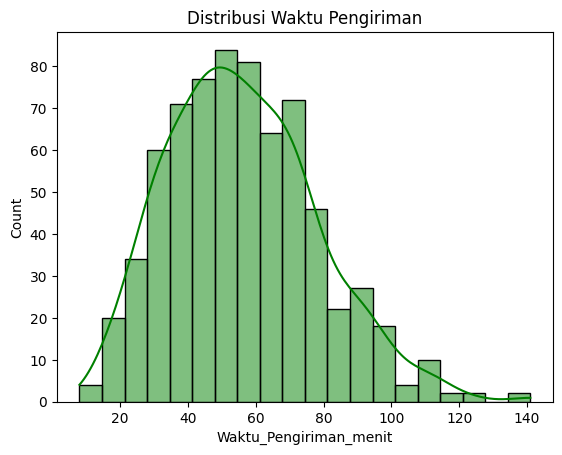

In [ ]:
sns.histplot(train['Waktu_Pengiriman_menit'], kde=True, color='green')
plt.title('Distribusi Waktu Pengiriman')
plt.show()

# **TAHAP PREPROCESSING**
*  Menghapus kolom non-penting seperti `Nama_Penerima`, `Alamat_Penerima`, `No_Telp_Penerima`, dan `Status` karena tidak relevan terhadap prediksi waktu.

**Menangani missing values:**
*  Kolom **numerik** seperti `Total_Pesanan` dan `Harga_Makanan` diisi dengan **median** karena **robust terhadap outlier.**
*  Kolom **kategorikal** seperti `Cuaca`, `Tingkat_Kemacetan`, dan `Waktu `diisi dengan **nilai modus (yang paling sering muncul).**

**Encoding fitur kategorikal menggunakan Label Encoding**, agar bisa diproses oleh model seperti **Random Forest dan XGBoost.**




In [ ]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    df = df.copy()

    # Drop kolom yang tidak berguna
    drop_cols = ['Nama_Penerima', 'Alamat_Penerima', 'No_Telp_Penerima', 'Status']
    df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

    # Isi missing values numerik dengan median
    for col in ['Total_Pesanan', 'Harga_Makanan']:
        df[col] = df[col].fillna(df[col].median())

    # Isi missing values kategorikal dengan modus (nilai terbanyak)
    for col in ['Cuaca', 'Tingkat_Kemacetan', 'Waktu']:
        df[col] = df[col].fillna(df[col].mode()[0])

    # Label Encoding untuk semua kolom kategorikal
    for col in df.select_dtypes(include='object').columns:
        df[col] = LabelEncoder().fit_transform(df[col])

    return df


In [ ]:
X = preprocess_data(X_raw)

# **Pengecekan apakah masih ada *NULL* pada object dari csv yang telah diisi dengan Preprocessing sebelumnya**

In [ ]:
print(X.isnull().sum())

ID_Pesanan               0
Jenis_Kelamin            0
Jarak_km                 0
Cuaca                    0
Tingkat_Kemacetan        0
Waktu                    0
Tipe_Kendaraan           0
Waktu_Persiapan_menit    0
Metode_Pembayaran        0
Tahun_Masuk              0
Total_Pesanan            0
Harga_Makanan            0
Menggunakan_Voucher      0
Biaya_Pengiriman         0
dtype: int64




---


# **Feature Importance** menggunakan **Random Forest** untuk melihat fitur paling berpengaruh:

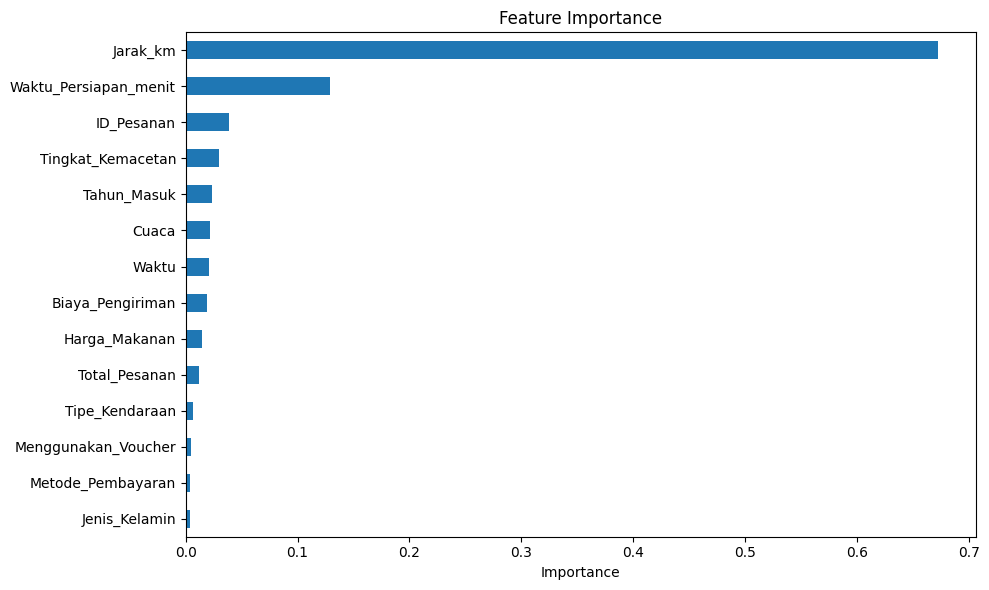

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


# **RESULT DARI DIAGRAM MENGENAI FITUR PALING BERPENGARUH:**

1. `Jarak_km` merupakan fitur paling dominan dalam menentukan lama waktu pengiriman. Hal ini sangat logis karena semakin jauh lokasi pengantaran, maka waktu pengiriman pun cenderung lebih lama.

2. `Waktu_Persiapan_menit` juga memiliki pengaruh besar, karena proses memasak/persiapan makanan memakan waktu sebelum makanan bisa dikirim.

3. Fitur lain seperti` Tingkat_Kemacetan`, `Cuaca`, dan` Biaya_Pengiriman` punya pengaruh lebih kecil, tetapi masih relevan karena dapat memengaruhi kecepatan perjalanan kurir.

Fitur lain seperti `Jenis_Kelamin`,` Metode_Pembayaran`, dan `Menggunakan_Voucher` memiliki pengaruh sangat kecil terhadap target, sehingga bisa dipertimbangkan untuk dihapus jika ingin menyederhanakan model.



---

# **Pelatihan Model (Model Training)**
Untuk memprediksi waktu pengiriman makanan, dilakukan pelatihan model regresi menggunakan tiga algoritma berbeda, yaitu:

* **Random Forest Regressor**
* **XGBoost Regressor**
* **LightGBM Regressor**

Sebelum pelatihan, data terlebih dahulu dibagi menjadi training set dan validation set dengan perbandingan 80:20 menggunakan `train_test_split`.


```
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

```

Masing-masing model kemudian dilatih dengan data latih (`X_train`, `y_train`) dan menghasilkan prediksi (`pred_rf`, `pred_xgb`, `pred_lgbm`) untuk data validasi `X_val`.

# **Contoh Pelatihan Model:**

```
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_val)
```



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_val)

# Model 2: XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_val)

from lightgbm import LGBMRegressor

# Model 3: LightGBM
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
pred_lgbm = lgbm.predict(X_val)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 457
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 14
[LightGBM] [Info] Start training from score 55.553571
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

# **Kenapa Model Random Forest, XGBoost, dan LightGBM Dipilih?**
* **Random Forest:**	Cocok untuk **data tabular**, **robust terhadap outlier & overfitting**, serta **interpretatif lewat feature importance.**
* **XGBoost:**	**Model boosting** yang **sangat powerful** dan **sering unggul di kompetisi.** Memiliki **kemampuan generalisasi** yang **baik.**
* **LightGBM:** **Alternatif boosting** yang **lebih ringan dan cepat dibanding XGBoost.** Efisien pada data berukuran besar.


---



In [ ]:

def evaluate(y_true, y_pred, model_name):
    print(f"{model_name}:")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("MSE :", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2  :", r2_score(y_true, y_pred))
    print("-" * 30)

evaluate(y_val, pred_rf, "Random Forest")
evaluate(y_val, pred_xgb, "XGBoost")
evaluate(y_val, pred_lgbm, "LightGBM")


Random Forest:
MAE : 9.182785714285714
MSE : 182.42975642857144
RMSE: 13.506656004673083
R2  : 0.6513989552955894
------------------------------
XGBoost:
MAE : 9.713115692138672
MSE : 211.74594116210938
RMSE: 14.551492746866534
R2  : 0.5953792929649353
------------------------------
LightGBM:
MAE : 8.563207927940446
MSE : 177.4635823464802
RMSE: 13.321545794181702
R2  : 0.660888709089559
------------------------------


In [ ]:
X_test = preprocess_data(test)
y_pred = rf.predict(X_test)
pred_df = pd.DataFrame({
    "ID_Pesanan": test["ID_Pesanan"],
    "Waktu_Pengiriman_menit": y_pred.astype(int)
})

pred_df.to_csv("submission_fix.csv", index=False)
print(pred_df.head())
print(pred_df.isnull().sum())
print(pred_df["Waktu_Pengiriman_menit"].describe())


   ID_Pesanan  Waktu_Pengiriman_menit
0         989                      53
1         174                      37
2         761                      39
3         494                      30
4         924                      69
ID_Pesanan                0
Waktu_Pengiriman_menit    0
dtype: int64
count    300.000000
mean      57.546667
std       19.093008
min       15.000000
25%       42.000000
50%       58.000000
75%       72.000000
max      102.000000
Name: Waktu_Pengiriman_menit, dtype: float64


Membuat save file untuk submission di Kaggle

In [ ]:
pred_df.to_csv("submission_fix2.csv", index=False)